In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0


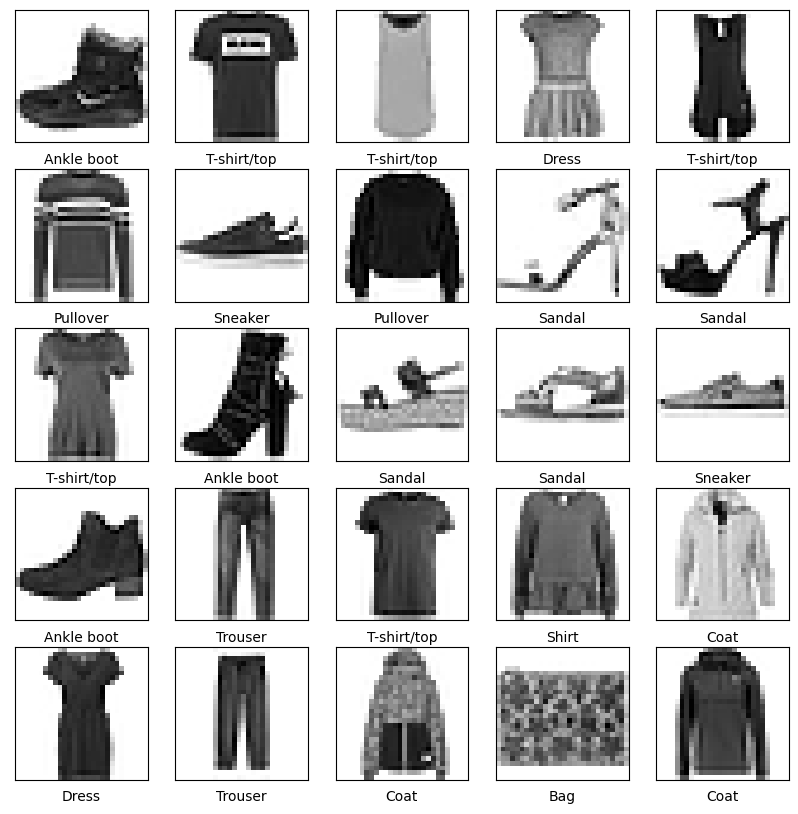

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [8]:
train_history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

!mkdir -p saved_model
model.save('saved_model/my_model')


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4898 - accuracy: 0.8218 - val_loss: 0.4141 - val_accuracy: 0.8512
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3652 - accuracy: 0.8658 - val_loss: 0.3951 - val_accuracy: 0.8533
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3293 - accuracy: 0.8777 - val_loss: 0.3409 - val_accuracy: 0.8773
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3045 - accuracy: 0.8859 - val_loss: 0.3342 - val_accuracy: 0.8804
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2863 - accuracy: 0.8936 - val_loss: 0.3298 - val_accuracy: 0.8845
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2701 - accuracy: 0.8975 - val_loss: 0.3259 - val_accuracy: 0.8836
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2557 - accuracy: 0.9031 - val_loss: 0.3399 - val_accuracy:

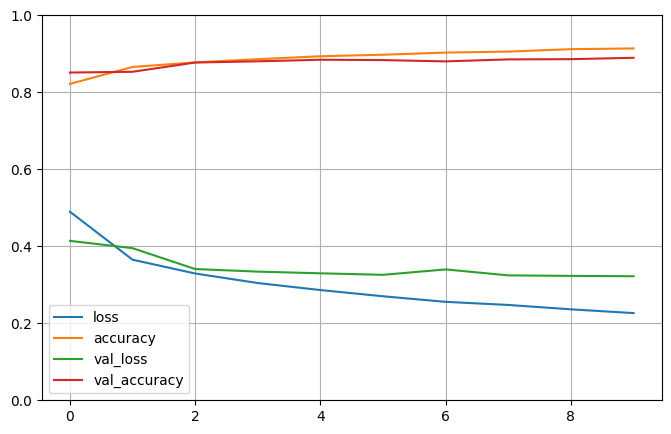

In [9]:
pd.DataFrame(train_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3470 - accuracy: 0.8814 - 2s/epoch - 5ms/step

Test accuracy: 0.8813999891281128


In [11]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [12]:
def weryfikacja(modelik, nr):
    new_model = tf.keras.models.load_model('saved_model/'+str(modelik))
    predictions = new_model.predict(test_images)
    
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(nr, predictions[nr], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(nr, predictions[nr],  test_labels)
    plt.show()


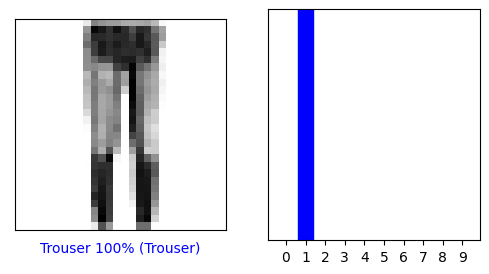

In [13]:
weryfikacja('my_model', 3)